### Importing Dependencies & Loading Data

In [1]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt 
from scipy.sparse.linalg import svds
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
df = io.loadmat('usps.mat')

In [2]:
X_train_img, y_train = df['train_patterns'], df['train_labels']
X_test_img, y_test = df['test_patterns'], df['test_labels']

### Helper Functions

In [3]:
#Function for decoding labels from one-hot encoding
# For each label, check index of 1 and return it as label. Outputs a list.
def oh_decode(oh_labels):
    decoded_labels = []
    for col in oh_labels.T:
        for i, e in enumerate(col):
            if e == 1:
                decoded_labels.append(i)
    return decoded_labels
#Function for grouping images based on the digit represented.
#Returns an array of arrays where the array at position 0 is all images of 0, etc.
def group_img(X, y):
    group_array = []
    labels = oh_decode(y) #Decodes corresponding labels
    for x in range(10): #Iterates through all images for each digit class, groups together
        x_matrix = []
        dim = np.unique(labels, return_counts=True)[1][x]
        for i, col in enumerate(X.T):
            if y[:,i][x] == 1:
                x_matrix.append(np.array(col.reshape(-1)))
        x_matrix = np.array(x_matrix)
        group_array.append(x_matrix)
# output as array of arrays
    return group_array
#Creating new collections for training images based on ordered dataset created by group_img function
X_train = group_img(X_train_img,y_train)
X_test = group_img(X_test_img,y_test)

### Plotting Individual Samples and Average Figures

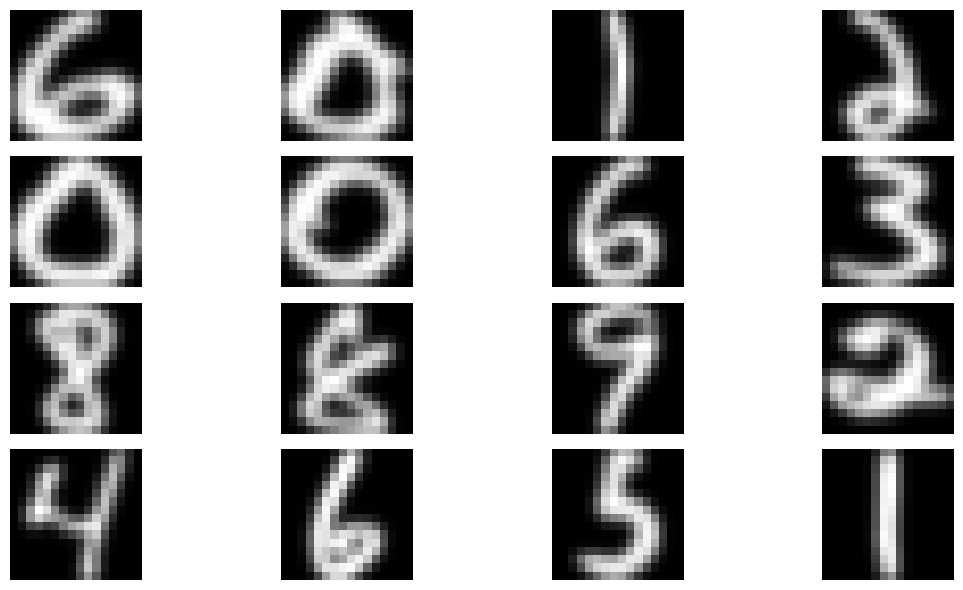

In [4]:
#Naive approach to plotting the first 16 images of the training dataset
fig, axs = plt.subplots(4, 4, figsize=(12, 6))
axs[0,0].imshow(np.reshape(X_train_img[:,0], (16, 16)), cmap='gray')
axs[0,0].axis("off")
axs[0,1].imshow(np.reshape(X_train_img[:,1], (16, 16)), cmap='gray')
axs[0,1].axis("off")
axs[0,2].imshow(np.reshape(X_train_img[:,2], (16, 16)), cmap='gray')
axs[0,2].axis("off")
axs[0,3].imshow(np.reshape(X_train_img[:,3], (16, 16)), cmap='gray')
axs[0,3].axis("off")
axs[1,0].imshow(np.reshape(X_train_img[:,4], (16, 16)), cmap='gray')
axs[1,0].axis("off")
axs[1,1].imshow(np.reshape(X_train_img[:,5], (16, 16)), cmap='gray')
axs[1,1].axis("off")
axs[1,2].imshow(np.reshape(X_train_img[:,6], (16, 16)), cmap='gray')
axs[1,2].axis("off")
axs[1,3].imshow(np.reshape(X_train_img[:,7], (16, 16)), cmap='gray')
axs[1,3].axis("off")
axs[2,0].imshow(np.reshape(X_train_img[:,8], (16, 16)), cmap='gray')
axs[2,0].axis("off")
axs[2,1].imshow(np.reshape(X_train_img[:,9], (16, 16)), cmap='gray')
axs[2,1].axis("off")
axs[2,2].imshow(np.reshape(X_train_img[:,10], (16, 16)), cmap='gray')
axs[2,2].axis("off")
axs[2,3].imshow(np.reshape(X_train_img[:,11], (16, 16)), cmap='gray')
axs[2,3].axis("off")
axs[3,0].imshow(np.reshape(X_train_img[:,12], (16, 16)), cmap='gray')
axs[3,0].axis("off")
axs[3,1].imshow(np.reshape(X_train_img[:,13], (16, 16)), cmap='gray')
axs[3,1].axis("off")
axs[3,2].imshow(np.reshape(X_train_img[:,14], (16, 16)), cmap='gray')
axs[3,2].axis("off")
axs[3,3].imshow(np.reshape(X_train_img[:,15], (16, 16)), cmap='gray')
axs[3,3].axis("off")

plt.tight_layout()
plt.show()

In [5]:
#Calculate the average of each digit class and append to an array containing averages
train_aves = []
test_classif_res = []
for i in range(10):
    ave = np.mean(X_train[i], axis = 0)
    train_aves.append(ave)

train_aves = np.array(train_aves)

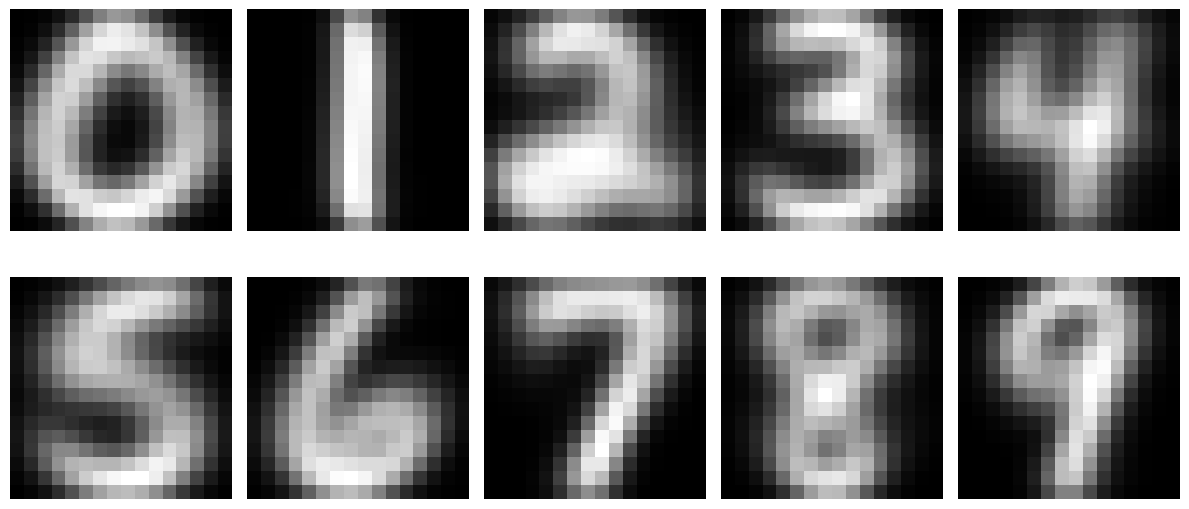

In [6]:
#Naive approach to plotting each average figure per digit
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
axs[0,0].imshow(np.reshape(train_aves[0], (16, 16)), cmap='gray')
axs[0,0].axis("off")
axs[0,1].imshow(np.reshape(train_aves[1], (16, 16)), cmap='gray')
axs[0,1].axis("off")
axs[0,2].imshow(np.reshape(train_aves[2], (16, 16)), cmap='gray')
axs[0,2].axis("off")
axs[0,3].imshow(np.reshape(train_aves[3], (16, 16)), cmap='gray')
axs[0,3].axis("off")
axs[0,4].imshow(np.reshape(train_aves[4], (16, 16)), cmap='gray')
axs[0,4].axis("off")
axs[1,0].imshow(np.reshape(train_aves[5], (16, 16)), cmap='gray')
axs[1,0].axis("off")
axs[1,1].imshow(np.reshape(train_aves[6], (16, 16)), cmap='gray')
axs[1,1].axis("off")
axs[1,2].imshow(np.reshape(train_aves[7], (16, 16)), cmap='gray')
axs[1,2].axis("off")
axs[1,3].imshow(np.reshape(train_aves[8], (16, 16)), cmap='gray')
axs[1,3].axis("off")
axs[1,4].imshow(np.reshape(train_aves[9], (16, 16)), cmap='gray')
axs[1,4].axis("off")

plt.tight_layout()
plt.show()

### Testing Simple Classification Algorithm

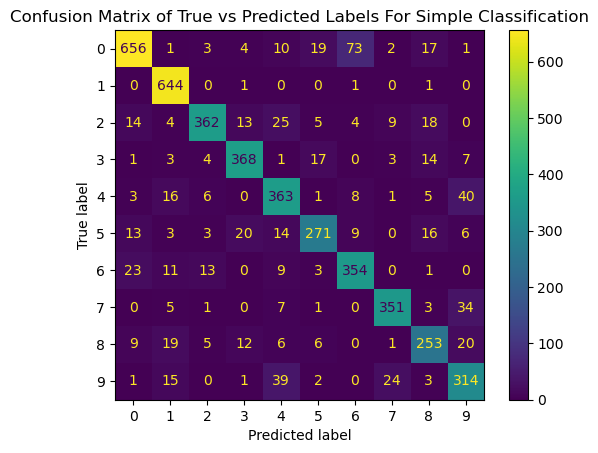

In [7]:
#Calculate predictions for the distance based approach
dists = []
test_classif = []
for i in range(X_test_img.shape[1]):
    for a in train_aves:
        dist = np.array(np.sqrt(sum((X_test_img[:,i] - a)**2))) #Distance formula
        dists.append(dist)
    test_classif.append(np.array(dists).T) #Append transposed vectors of distances
    dists = []

predictions = []

#for each column in the array of distances, find minimum and take the label corresponding to that index
for i in range(X_test_img.shape[1]):
    predictions.append(np.argmin(test_classif[i], axis = 0))

test_classif_res = np.array(predictions).reshape(1, 4649)

#Create a confusion mat
y_true = oh_decode(y_test) #Decode test labels
cm_labels = [0,1,2,3,4,5,6,7,8,9]
test_confusion = confusion_matrix(y_true, predictions, labels = cm_labels)
test_confusion_display = ConfusionMatrixDisplay(confusion_matrix = test_confusion, display_labels=cm_labels) 

test_confusion_display.plot()
plt.title('Confusion Matrix of True vs Predicted Labels For Simple Classification')
plt.show()


In [8]:
correct = 0
for i, elem in enumerate(predictions): #calculates the accuracy rate for each digit class based on predictions
    if elem == y_true[i]:
        correct += 1 
accuracy = correct / len(predictions); accuracy

0.8466336846633684

### SVD Classification & Function for finding best k 

In [9]:
def usps_svd_classification(X_train, X_test_img, y_train, y_test, k_max):
    """
Implemented the rank k SVD-based classification on the usps dataset
INPUT:
- X_train: matrix of training images grouped by digit j 
- X_test_img: matrix of test images NOT grouped by digit j (original order)
- y_train: one-hot encoded labels for the train data 
- y_test: one-hot encoded labels for the test data
- k: maximum value for k that will be tested by algorithm
OUTPUT:
- accuracies: the overall classification accuracies of the test_patterns for each k
- test_predict: the predicted label for the test_patterns for the best k. 
"""
    def predict(X_test_img): #helper function that selects minimum value for error of rank-k approximation
        classes = [U0,U1,U2,U3,U4,U5,U6,U7,U8,U9] 
        preds = []
        for U in classes:
            preds.append(np.linalg.norm((np.identity(len(U))-np.matrix(U)*np.matrix(U.T)).dot(X_test_img),ord=2)
                        /np.linalg.norm(X_test_img,ord=2)) #Computes the rank-k approximation for each set of left singular values
        return preds.index(min(preds))
    accuracies = []

    y_true = oh_decode(y_test) #decodes labels to their respective values
    for k in range(1,k_max+1): #compute singular vectors for each digit based on k
        U0, _, _ = svds(X_train[0].T, k) 
        U1, _, _ = svds(X_train[1].T, k)
        U2, _, _ = svds(X_train[2].T, k)
        U3, _, _ = svds(X_train[3].T, k)
        U4, _, _ = svds(X_train[4].T, k)
        U5, _, _ = svds(X_train[5].T, k)
        U6, _, _ = svds(X_train[6].T, k)
        U7, _, _ = svds(X_train[7].T, k)
        U8, _, _ = svds(X_train[8].T, k)
        U9, _, _ = svds(X_train[9].T, k)
        predictions = []
        for i in range(X_test_img.shape[1]):
            predictions.append(predict(X_test_img[:,i]))
        correct = 0
        for i, elem in enumerate(predictions): #calculates the accuracy rate for each digit class based on predictions
            if elem == y_true[i]:
                correct += 1 
        accuracy = correct / len(predictions)
        accuracies.append(accuracy)
        if accuracy == max(accuracies): 
            test_predict = predictions #If the accuracy is the best in the list currently, update to keep its corresponding predictions
            best_k = k 

    return accuracies, test_predict
                

In [10]:
accuracies, best_pred= usps_svd_classification(X_train, X_test_img, y_train, y_test, 20) 
#run the function for each k in range of 20

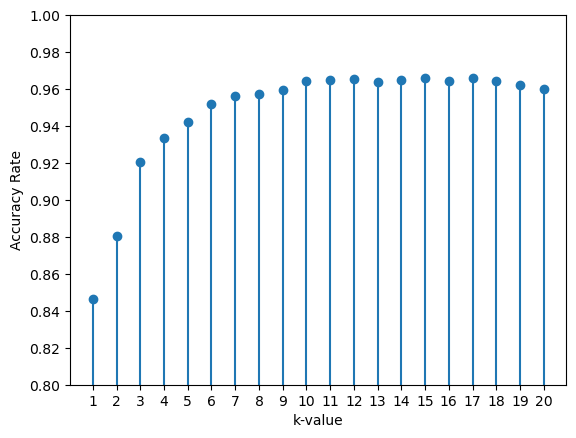

In [11]:
#plot each accuracy along with its corresponding k.
fig, ax = plt.subplots(facecolor='white')
ax.stem(range(1,21), accuracies)
y = np.array([0.8, 1.02])
plt.ylim(0.8,1)
ax.xaxis.set(ticks =list(range(1,21)), label_text = 'k-value' )
ax.yaxis.set(ticks=np.arange(y.min(), y.max(), 0.02), label_text='Accuracy Rate')
plt.yticks(np.arange(y.min(), y.max(), 0.02))
plt.show()

### SVD Method Confusion Matrix

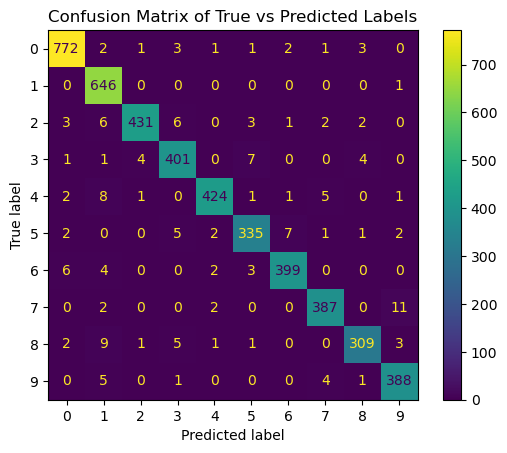

In [12]:
#Once again utilizing the sklearn confusion matrix display functionality

cm_labels = [0,1,2,3,4,5,6,7,8,9]
test_svd_confusion = confusion_matrix(y_true, best_pred, labels = cm_labels)
test_svd_confusion_display = ConfusionMatrixDisplay(confusion_matrix = test_svd_confusion, display_labels=cm_labels) 
#This time, plot the comparison between SVD method prediction and true labels

test_svd_confusion_display.plot()
plt.title('Confusion Matrix of True vs Predicted Labels')
plt.show()

In [13]:
#Snippet of leftover code to display the overall accuracy % of the best prediction
correct = 0
for i, elem in enumerate(best_pred):
    if elem == y_true[i]:
        correct += 1 

correct / len(best_pred)

0.9662292966229297